In [1]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (24,12)

In [2]:
def parse_data(viruses):
    location_points = {}  # map from "lat_long_location,country" to "region", "latitude", "longitude", "magnitude"
    region_to_color = {'africa':'#A0CCA5', 'china':'#A76BB1', 'europe':'#658447', 'south_asia':'#EBA85F', 
                       'japan_korea':'#2A4786', 'north_america':'#D6C568', 'oceania':'#8E1616', 'south_pacific':'#DF4327',
                       'south_america':'#926224','southeast_asia':'#8FBDD0', 'west_asia':'#76104B'}
    for v in viruses:
        if 'lat_long_location' in v and 'country' in v:
            if (v['lat_long_location']+":"+v['country']) in location_points:
                location_points[v['lat_long_location']+":"+v['country']]['magnitude']+=1
            else:
                new_location_point = {'region':v['region'],'latitude':v['latitude'], 'longitude':v['longitude'], 'magnitude':1}
                location_points[v['lat_long_location']+":"+v['country']] = new_location_point
    longs, lats, magnitudes, colors = [], [], [], []
    for point in location_points.values():
        longs.append(point['longitude'])
        lats.append(point['latitude'])
        magnitudes.append(point['magnitude'])
        if 'region' in point and point['region'] is not None:
            colors.append(region_to_color[point['region']])
        else:
            colors.append('white')
    return (longs, lats, magnitudes, colors)

In [3]:
def plot_map(long_lat_mag_col, max_magnitude, title, max_marker_size=40):
    # --- Build Map ---
    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt
    import numpy as np

    eq_map = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
    eq_map.drawcountries(color = 'white', linewidth=1.0)
    eq_map.fillcontinents(color = '#E4E2DA')
    eq_map.drawmapboundary(color = 'white')
    for lon, lat, mag, col in long_lat_mag_col:
        x,y = eq_map(lon, lat)
        msize = np.sqrt(mag/max_magnitude) * max_marker_size
        #msize = (mag/max_magnitude) * max_marker_size
        eq_map.plot(x, y, 'ko', c=col, markersize=msize)
    plt.title(title)
    plt.show()

In [4]:
def global_distribution_plot(fname, title):
    import json
    file = open(fname, 'r')
    viruses = json.load(file)
    llmc_tuple = parse_data(viruses)
    max_magnitude = max(llmc_tuple[2])
    # sort by magnitude, largest first
    long_lat_mag_col = sorted(zip(llmc_tuple[0], llmc_tuple[1], llmc_tuple[2], llmc_tuple[3]),key=lambda m: m[2], reverse=True) 
    plot_map(long_lat_mag_col, max_magnitude, title)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


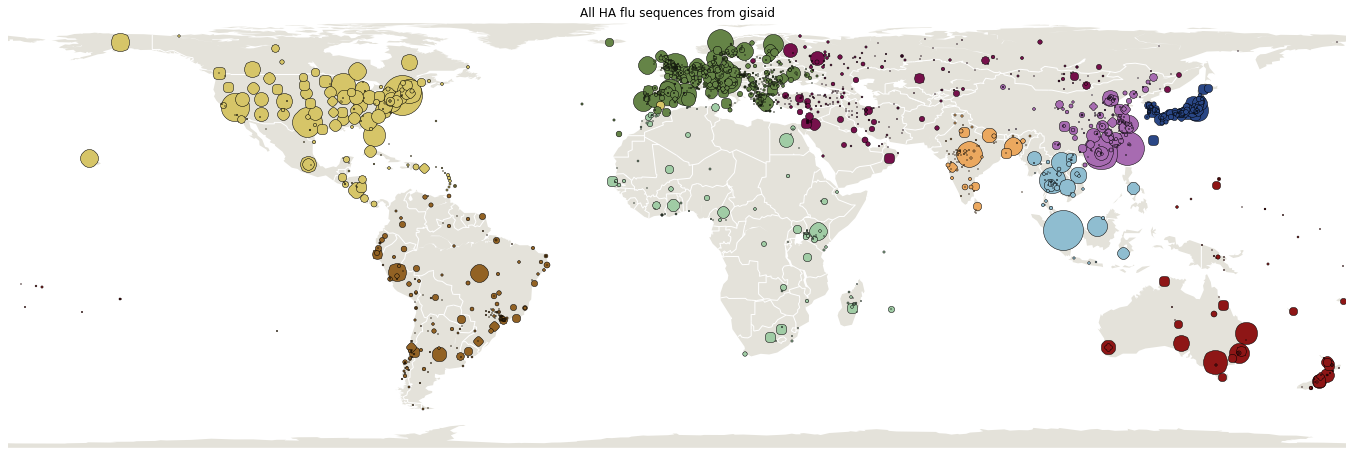

In [5]:
# All HA flu sequences from gisaid
fname = "data/flu_2016_08_04_HA.json"
title = "All HA flu sequences from gisaid"
global_distribution_plot(fname, title)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


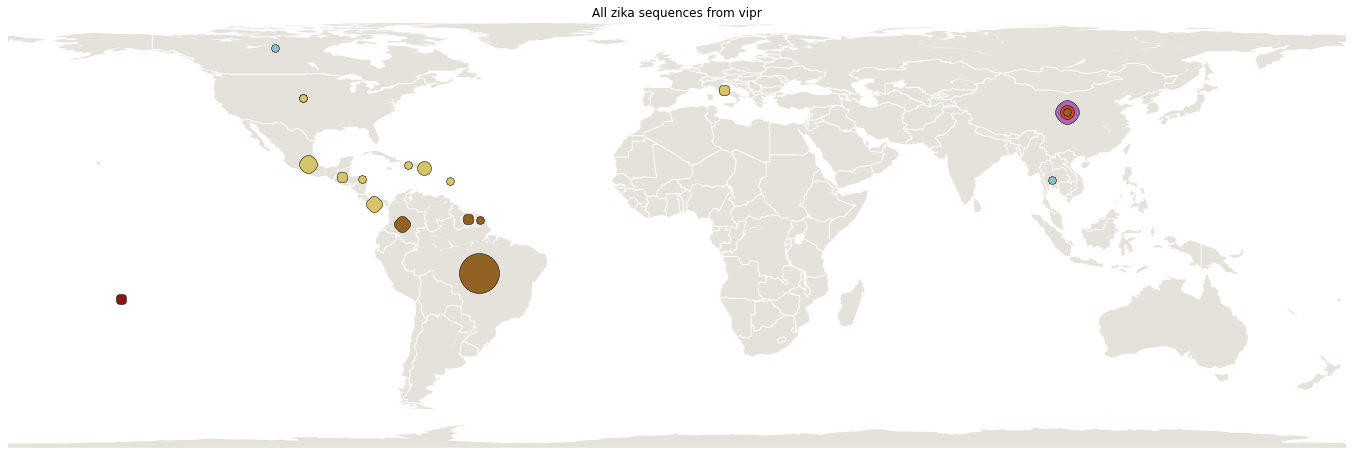

In [6]:
# All zika sequences from vipr
fname = "data/zika_2016_08_03.json"
title = "All zika sequences from vipr"
global_distribution_plot(fname, title)